# TauSpec Tutorial: Optical Depth Power Spectra

This notebook demonstrates how to use the TauSpec package to calculate optical depth power spectra during the Epoch of Reionization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tauspec import TauSpecCalculator
from tauspec.config import CosmologyConfig, ReionizationConfig, BubbleConfig

# Configure plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## 1. Configuration

Set up the cosmological parameters, reionization model, and bubble properties.

In [2]:
# Cosmology (Planck 2018-like)
cosmo_config = CosmologyConfig(
    h=0.69,
    omega_m=0.2877,
    omega_b=0.04757,
    omega_lambda=0.721,
    n_s=0.9667,
    sigma8=0.80
)

# Reionization (tanh model)
reion_config = ReionizationConfig(
    model='tanh',
    z_re=7.5,      # Reionization redshift
    delta_z=2.0    # Duration
)

# Bubble properties
bubble_config = BubbleConfig(
    Rb=5.0,                 # Characteristic bubble size (Mpc)
    sigma_lnr=np.log(2),   # Width of distribution
    b=6.0,                 # Linear bias
    T0=2e4                 # Temperature (K)
)

print("Configuration complete!")

Configuration complete!


## 2. Initialize Calculator

In [3]:
calc = TauSpecCalculator(cosmo_config, reion_config, bubble_config)
print("Calculator initialized!")

Calculator initialized!


## 3. Ionization Fraction History

Calculate and plot the ionization fraction as a function of redshift.

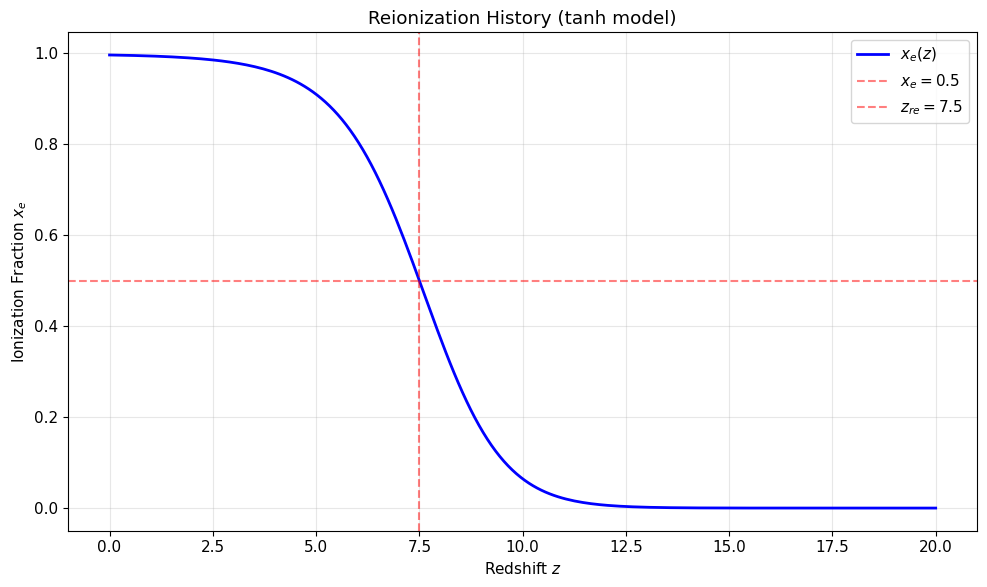

In [4]:
z = np.linspace(0, 20, 200)
xe = calc.xe(z)

plt.figure(figsize=(10, 6))
plt.plot(z, xe, 'b-', linewidth=2, label='$x_e(z)$')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='$x_e = 0.5$')
plt.axvline(x=reion_config.z_re, color='r', linestyle='--', alpha=0.5, 
            label=f'$z_{{re}} = {reion_config.z_re}$')
plt.xlabel('Redshift $z$')
plt.ylabel('Ionization Fraction $x_e$')
plt.title('Reionization History (tanh model)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Ionization Fraction Power Spectrum

Calculate $P_{x_e}(k, z)$ at different redshifts.

/Users/anirbanroy/Desktop/tauspec_pkg/tauspec/calculator.py:204: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, R_min, R_max, limit=100)
/Users/anirbanroy/Desktop/tauspec_pkg/tauspec/calculator.py:243: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval

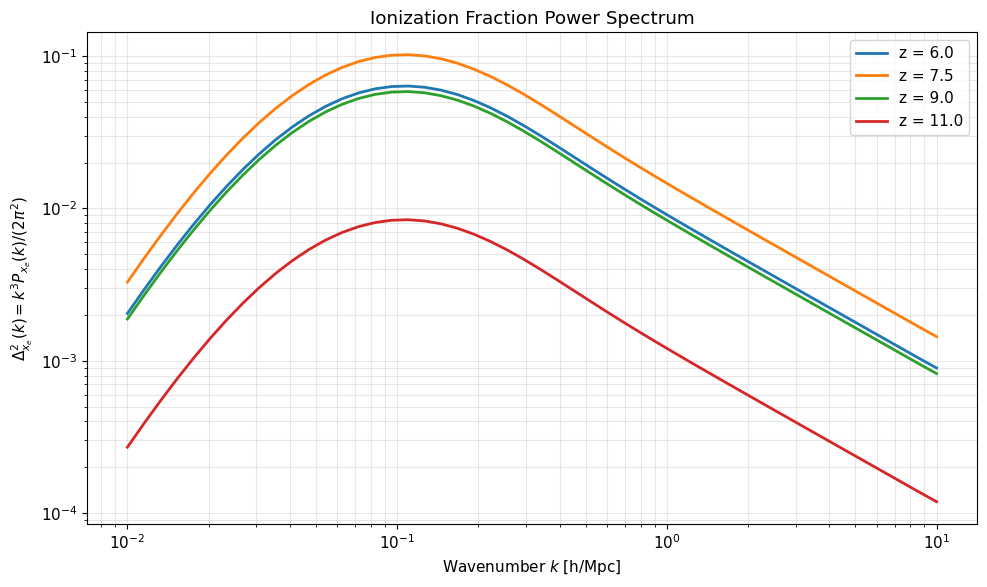

In [5]:
k = np.logspace(-2, 1, 50)
redshifts = [6.0, 7.5, 9.0, 11.0]

plt.figure(figsize=(10, 6))

for z_val in redshifts:
    pxe = calc.p_xexe(z_val, k)
    delta_xe = k**3 * pxe / (2 * np.pi**2)
    plt.loglog(k, delta_xe, linewidth=2, label=f'z = {z_val}')

plt.xlabel('Wavenumber $k$ [h/Mpc]')
plt.ylabel(r'$\Delta_{x_e}^2(k) = k^3 P_{x_e}(k)/(2\pi^2)$')
plt.title('Ionization Fraction Power Spectrum')
plt.legend()
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

## 5. Optical Depth Power Spectrum

Calculate $C_\ell^{\tau\tau}$ - the main result!

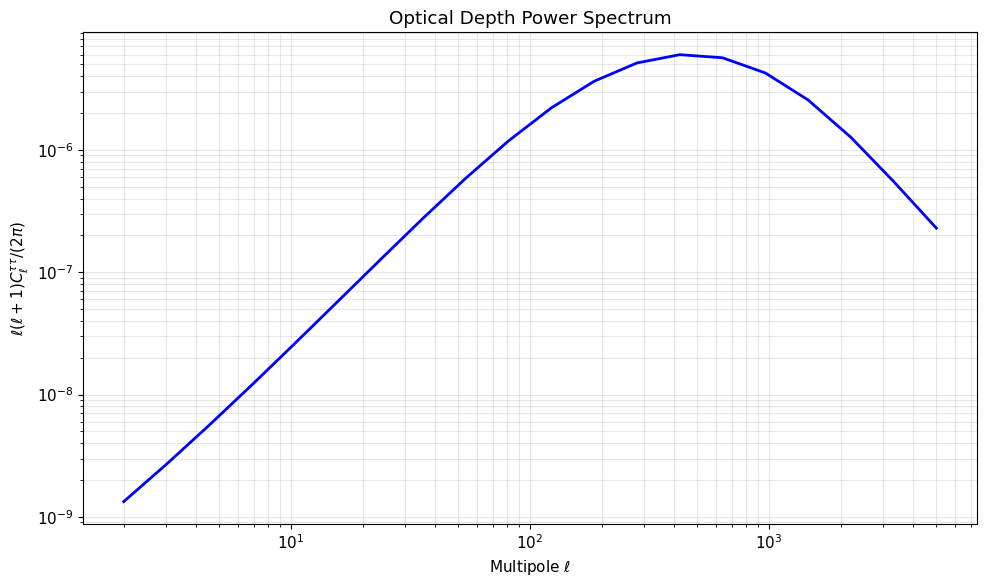

In [6]:
ell = np.logspace(np.log10(2), np.log10(5000), 20)
cl_tau = calc.cltau(ell)

plt.figure(figsize=(10, 6))
plt.loglog(ell, ell * (ell + 1) * cl_tau / (2 * np.pi), 'b-', linewidth=2)
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{\tau\tau}/(2\pi)$')
plt.title('Optical Depth Power Spectrum')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

## 6. Parameter Dependence

Explore how results depend on bubble size $R_b$.

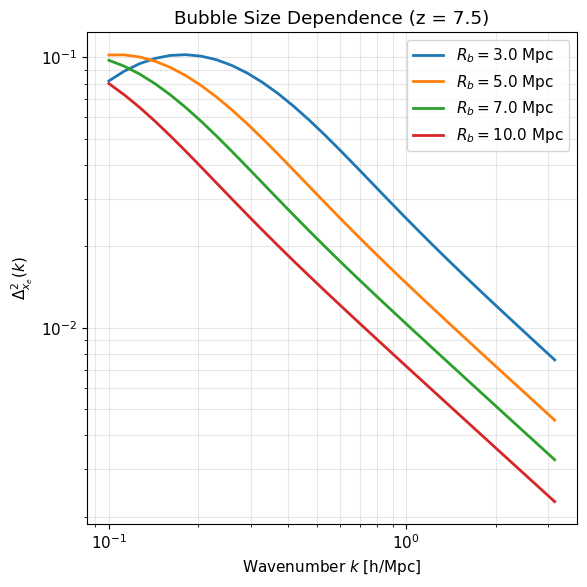

In [8]:
Rb_values = [3.0, 5.0, 7.0, 10.0]
z_test = 7.5
k_test = np.logspace(-1, 0.5, 30)

plt.figure(figsize=(6, 6))

for Rb in Rb_values:
    bubble_config_test = BubbleConfig(Rb=Rb, sigma_lnr=np.log(2), b=6.0)
    calc_test = TauSpecCalculator(cosmo_config, reion_config, bubble_config_test)
    
    pxe = calc_test.p_xexe(z_test, k_test)
    delta_xe = k_test**3 * pxe / (2 * np.pi**2)
    
    plt.loglog(k_test, delta_xe, linewidth=2, label=f'$R_b = {Rb}$ Mpc')

plt.xlabel('Wavenumber $k$ [h/Mpc]')
plt.ylabel(r'$\Delta_{x_e}^2(k)$')
plt.title(f'Bubble Size Dependence (z = {z_test})')
plt.legend()
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

## 7. Save Results

Save the calculated spectra to files.

In [9]:
# Save ionization fraction history
calc.save_output('xe', filename='xe_history.dat')

# Save power spectrum at z=7.5
calc.save_output('pxe', z=7.5, k=k, filename='pxe_z7.5.dat')

# Save C_l^tau
calc.save_output('cltau', ell=ell, filename='cltau_spectrum.dat')

print("Results saved!")
print("Files: xe_history.dat, pxe_z7.5.dat, cltau_spectrum.dat")

Results saved!
Files: xe_history.dat, pxe_z7.5.dat, cltau_spectrum.dat


## Summary

This notebook demonstrated:
1. Setting up configurations
2. Calculating reionization history
3. Computing ionization fraction power spectra
4. Computing optical depth power spectra
5. Exploring parameter dependencies
6. Saving results

For more information, see the documentation in the README.md file.

  TauSpec: C_l^tau and C_l^tau_y Calculation Example

1. Setting up configuration...
   ✓ Cosmology: h=0.69, Ωm=0.2877
   ✓ Reionization: z_re=7.5, Δz=2.0
   ✓ Bubbles: Rb=5.0 Mpc, T0=2e+04 K

2. Initializing calculator...
   ✓ Calculator ready

3. Calculating C_l^tau (optical depth power spectrum)...
   ✓ Calculated for 20 multipoles
   ✓ C_l^tau(l=100) = 1.0215e-09

4. Calculating C_l^tau_y (temperature-weighted)...
   ✓ Calculated for 20 multipoles
   ✓ C_l^tau_y(l=100) = 3.4506e-15

5. Physical interpretation...
   Expected ratio: C_l^tau_y / C_l^tau ≈ k_B/(m_e c²) × T₀
                                        = 3.3780e-06
   Actual ratio (at l=123): 3.3780e-06
   Agreement: 100.0%

6. Saving results...
   ✓ Saved cl_tau_example.dat
   ✓ Saved cl_tau_y_example.dat
   ✓ Saved cl_tau_combined.dat

7. Creating plots...
   ✓ Saved cl_tau_comparison.png


/Users/anirbanroy/Desktop/tauspec_pkg/tauspec/calculator.py:204: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, R_min, R_max, limit=100)
/Users/anirbanroy/Desktop/tauspec_pkg/tauspec/calculator.py:243: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval

   ✓ Saved cl_tau_analysis.png

9. Exploring temperature dependence...


/var/folders/cg/gj1m_7rs47b24g050xstjjp80000gn/T/ipykernel_86455/1641401444.py:268: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/cg/gj1m_7rs47b24g050xstjjp80000gn/T/ipykernel_86455/1641401444.py:269: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.savefig('cl_tau_y_temperature_dependence.png', dpi=150, bbox_inches='tight')


   ✓ Saved cl_tau_y_temperature_dependence.png

10. Summary Statistics
   ------------------------------------------------------------
   Multipole       C_l^tau              C_l^tau_y            Ratio          
   ------------------------------------------------------------
          2.0     1.3941e-09       4.7092e-15       3.3780e-06
         15.7     1.3797e-09       4.6607e-15       3.3780e-06
        122.9     9.1066e-10       3.0762e-15       3.3780e-06
        963.0     2.8812e-11       9.7326e-17       3.3780e-06
       5000.0     5.7594e-14       1.9455e-19       3.3780e-06
   ------------------------------------------------------------

  Example completed successfully!

📁 Output files created:
   • cl_tau_example.dat             - C_l^tau data
   • cl_tau_y_example.dat           - C_l^tau_y data
   • cl_tau_combined.dat            - Both spectra
   • cl_tau_comparison.png          - Main comparison plots
   • cl_tau_analysis.png            - Physical analysis
   • cl_tau_y_

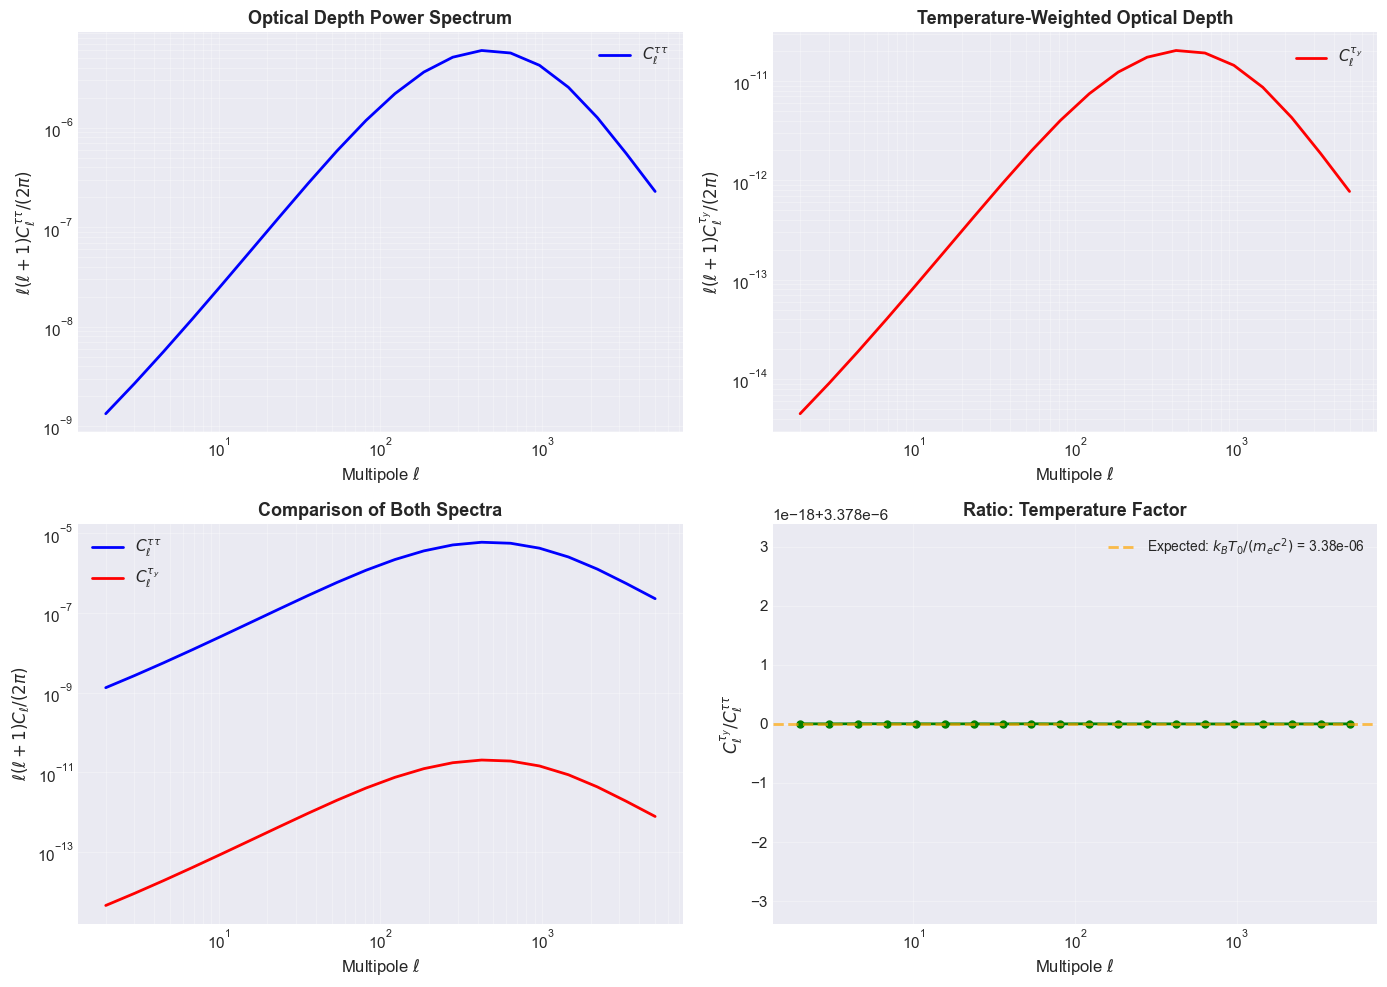

/opt/anaconda3/envs/denario_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8467 (\N{SCRIPT SMALL L}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


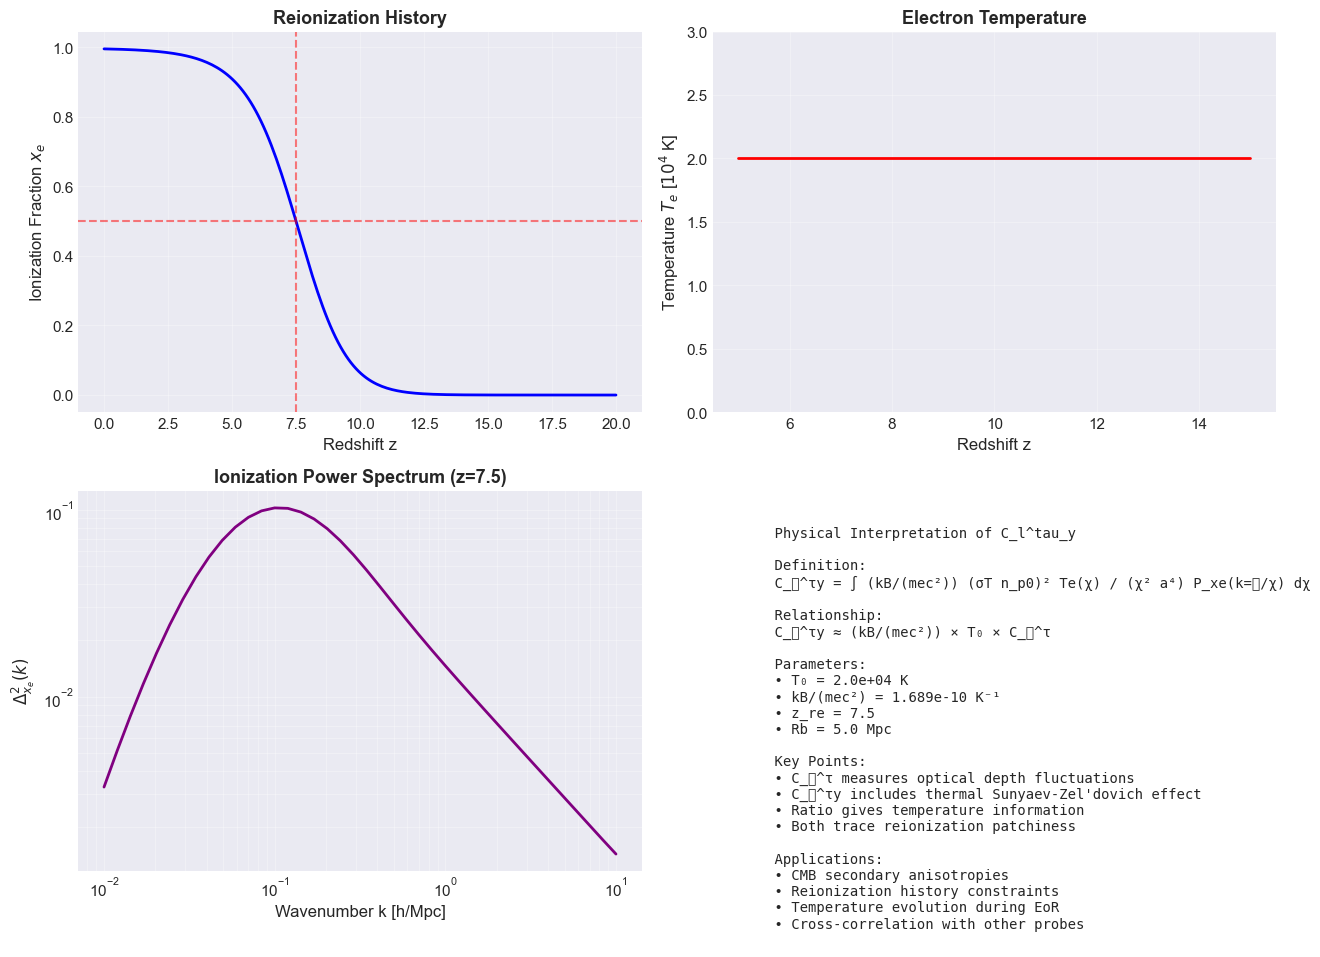

/opt/anaconda3/envs/denario_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


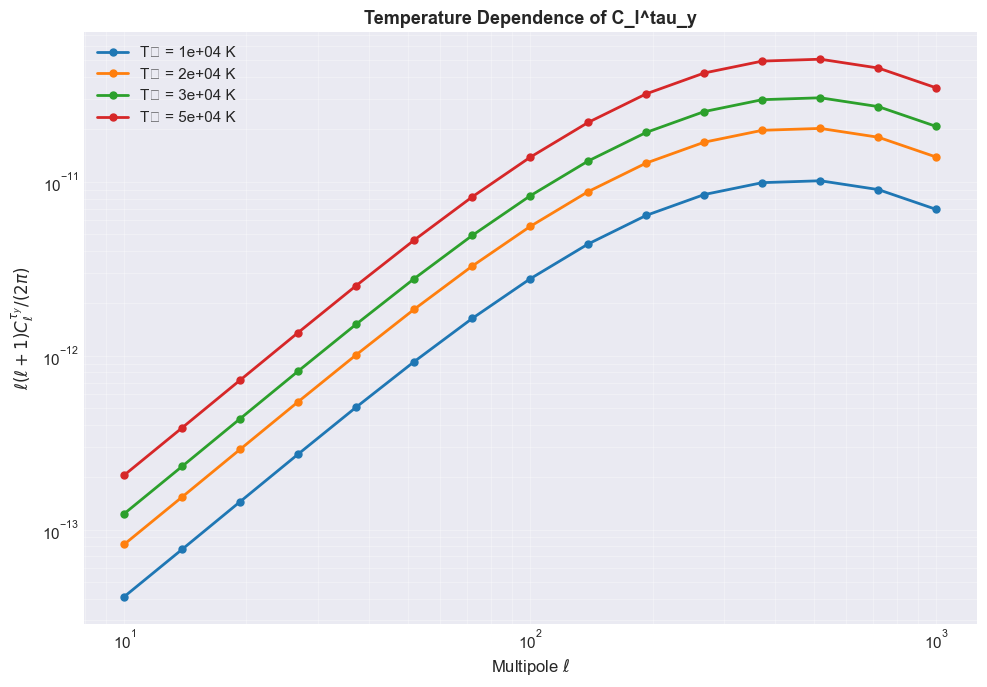

In [12]:
#!/usr/bin/env python3
"""
Complete example: Calculate both C_l^tau and C_l^tau_y

This script demonstrates:
1. Calculating optical depth power spectrum (C_l^tau)
2. Calculating temperature-weighted optical depth power spectrum (C_l^tau_y)
3. Comparing the two spectra
4. Exploring their relationship and physical interpretation
"""

import numpy as np
import matplotlib.pyplot as plt
from tauspec import TauSpecCalculator
from tauspec.config import CosmologyConfig, ReionizationConfig, BubbleConfig

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid' if 'seaborn-v0_8-darkgrid' in plt.style.available else 'default')
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 11

def main():
    """Main example script."""
    
    print("=" * 70)
    print("  TauSpec: C_l^tau and C_l^tau_y Calculation Example")
    print("=" * 70)
    
    # 1. Configuration
    print("\n1. Setting up configuration...")
    
    cosmo_config = CosmologyConfig(
        h=0.69,
        omega_m=0.2877,
        omega_b=0.04757,
        omega_lambda=0.721,
        n_s=0.9667,
        sigma8=0.80
    )
    
    reion_config = ReionizationConfig(
        model='tanh',
        z_re=7.5,
        delta_z=2.0
    )
    
    bubble_config = BubbleConfig(
        Rb=5.0,
        sigma_lnr=np.log(2),
        b=6.0,
        T0=2e4  # Temperature in Kelvin
    )
    
    print(f"   ✓ Cosmology: h={cosmo_config.h}, Ωm={cosmo_config.omega_m}")
    print(f"   ✓ Reionization: z_re={reion_config.z_re}, Δz={reion_config.delta_z}")
    print(f"   ✓ Bubbles: Rb={bubble_config.Rb} Mpc, T0={bubble_config.T0:.0e} K")
    
    # 2. Initialize calculator
    print("\n2. Initializing calculator...")
    calc = TauSpecCalculator(cosmo_config, reion_config, bubble_config)
    print("   ✓ Calculator ready")
    
    # 3. Calculate C_l^tau (optical depth power spectrum)
    print("\n3. Calculating C_l^tau (optical depth power spectrum)...")
    ell = np.logspace(np.log10(2), np.log10(5000), 20)
    cl_tau = calc.cltau(ell)
    print(f"   ✓ Calculated for {len(ell)} multipoles")
    print(f"   ✓ C_l^tau(l=100) = {np.interp(100, ell, cl_tau):.4e}")
    
    # 4. Calculate C_l^tau_y (temperature-weighted)
    print("\n4. Calculating C_l^tau_y (temperature-weighted)...")
    cl_tau_y = calc.cltau_y(ell)
    print(f"   ✓ Calculated for {len(ell)} multipoles")
    print(f"   ✓ C_l^tau_y(l=100) = {np.interp(100, ell, cl_tau_y):.4e}")
    
    # 5. Physical interpretation
    print("\n5. Physical interpretation...")
    k_B_over_mec2 = 1.689e-10  # K^-1
    expected_ratio = k_B_over_mec2 * bubble_config.T0
    actual_ratio = cl_tau_y[10] / cl_tau[10]  # At ell=10
    
    print(f"   Expected ratio: C_l^tau_y / C_l^tau ≈ k_B/(m_e c²) × T₀")
    print(f"                                        = {expected_ratio:.4e}")
    print(f"   Actual ratio (at l={ell[10]:.0f}): {actual_ratio:.4e}")
    print(f"   Agreement: {(actual_ratio/expected_ratio)*100:.1f}%")
    
    # 6. Save results
    print("\n6. Saving results...")
    
    # Save C_l^tau
    calc.save_output('cltau', ell=ell, filename='cl_tau_example.dat')
    print("   ✓ Saved cl_tau_example.dat")
    
    # Save C_l^tau_y (manual save since it's not in standard save_output)
    np.savetxt(
        'cl_tau_y_example.dat',
        np.column_stack([ell, cl_tau_y]),
        header='ell\t\tC_l^tau_y',
        fmt='%e'
    )
    print("   ✓ Saved cl_tau_y_example.dat")
    
    # Save combined file
    np.savetxt(
        'cl_tau_combined.dat',
        np.column_stack([ell, cl_tau, cl_tau_y]),
        header='ell\t\tC_l^tau\t\tC_l^tau_y',
        fmt='%e'
    )
    print("   ✓ Saved cl_tau_combined.dat")
    
    # 7. Create comprehensive plots
    print("\n7. Creating plots...")
    
    fig = plt.figure(figsize=(14, 10))
    
    # Plot 1: C_l^tau
    ax1 = plt.subplot(2, 2, 1)
    ax1.loglog(ell, ell * (ell + 1) * cl_tau / (2 * np.pi), 
               'b-', linewidth=2, label=r'$C_\ell^{\tau\tau}$')
    ax1.set_xlabel(r'Multipole $\ell$', fontsize=12)
    ax1.set_ylabel(r'$\ell(\ell+1)C_\ell^{\tau\tau}/(2\pi)$', fontsize=12)
    ax1.set_title('Optical Depth Power Spectrum', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3, which='both')
    ax1.legend(fontsize=11)
    
    # Plot 2: C_l^tau_y
    ax2 = plt.subplot(2, 2, 2)
    ax2.loglog(ell, ell * (ell + 1) * cl_tau_y / (2 * np.pi), 
               'r-', linewidth=2, label=r'$C_\ell^{\tau_y}$')
    ax2.set_xlabel(r'Multipole $\ell$', fontsize=12)
    ax2.set_ylabel(r'$\ell(\ell+1)C_\ell^{\tau_y}/(2\pi)$', fontsize=12)
    ax2.set_title('Temperature-Weighted Optical Depth', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3, which='both')
    ax2.legend(fontsize=11)
    
    # Plot 3: Both spectra together
    ax3 = plt.subplot(2, 2, 3)
    ax3.loglog(ell, ell * (ell + 1) * cl_tau / (2 * np.pi), 
               'b-', linewidth=2, label=r'$C_\ell^{\tau\tau}$')
    ax3.loglog(ell, ell * (ell + 1) * cl_tau_y / (2 * np.pi), 
               'r-', linewidth=2, label=r'$C_\ell^{\tau_y}$')
    ax3.set_xlabel(r'Multipole $\ell$', fontsize=12)
    ax3.set_ylabel(r'$\ell(\ell+1)C_\ell/(2\pi)$', fontsize=12)
    ax3.set_title('Comparison of Both Spectra', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3, which='both')
    ax3.legend(fontsize=11)
    
    # Plot 4: Ratio
    ax4 = plt.subplot(2, 2, 4)
    ratio = cl_tau_y / cl_tau
    ax4.semilogx(ell, ratio, 'g-', linewidth=2, marker='o', markersize=5)
    ax4.axhline(y=expected_ratio, color='orange', linestyle='--', 
                linewidth=2, alpha=0.7, 
                label=rf'Expected: $k_B T_0/(m_e c^2)$ = {expected_ratio:.2e}')
    ax4.set_xlabel(r'Multipole $\ell$', fontsize=12)
    ax4.set_ylabel(r'$C_\ell^{\tau_y} / C_\ell^{\tau\tau}$', fontsize=12)
    ax4.set_title('Ratio: Temperature Factor', fontsize=13, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=10)
    
    plt.tight_layout()
    plt.savefig('cl_tau_comparison.png', dpi=150, bbox_inches='tight')
    print("   ✓ Saved cl_tau_comparison.png")
    
    # 8. Additional analysis plot
    fig2, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Ionization fraction history
    ax = axes[0, 0]
    z_xe = np.linspace(0, 20, 200)
    xe = calc.xe(z_xe)
    ax.plot(z_xe, xe, 'b-', linewidth=2)
    ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
    ax.axvline(x=reion_config.z_re, color='r', linestyle='--', alpha=0.5)
    ax.set_xlabel('Redshift z', fontsize=12)
    ax.set_ylabel('Ionization Fraction $x_e$', fontsize=12)
    ax.set_title('Reionization History', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Temperature profile
    ax = axes[0, 1]
    z_temp = np.linspace(5, 15, 100)
    T_e = calc.te(z_temp)
    ax.plot(z_temp, T_e / 1e4, 'r-', linewidth=2)
    ax.set_xlabel('Redshift z', fontsize=12)
    ax.set_ylabel(r'Temperature $T_e$ [$10^4$ K]', fontsize=12)
    ax.set_title('Electron Temperature', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 3])
    
    # Power spectrum P_xe at z_re
    ax = axes[1, 0]
    k = np.logspace(-2, 1, 40)
    pxe = calc.p_xexe(reion_config.z_re, k)
    delta_xe = k**3 * pxe / (2 * np.pi**2)
    ax.loglog(k, delta_xe, 'purple', linewidth=2)
    ax.set_xlabel('Wavenumber k [h/Mpc]', fontsize=12)
    ax.set_ylabel(r'$\Delta_{x_e}^2(k)$', fontsize=12)
    ax.set_title(f'Ionization Power Spectrum (z={reion_config.z_re})', 
                 fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    
    # Information panel
    ax = axes[1, 1]
    ax.axis('off')
    
    info_text = f"""
    Physical Interpretation of C_l^tau_y
    
    Definition:
    C_ℓ^τy = ∫ (kB/(mec²)) (σT n_p0)² Te(χ) / (χ² a⁴) P_xe(k=ℓ/χ) dχ
    
    Relationship:
    C_ℓ^τy ≈ (kB/(mec²)) × T₀ × C_ℓ^τ
    
    Parameters:
    • T₀ = {bubble_config.T0:.1e} K
    • kB/(mec²) = {k_B_over_mec2:.3e} K⁻¹
    • z_re = {reion_config.z_re}
    • Rb = {bubble_config.Rb} Mpc
    
    Key Points:
    • C_ℓ^τ measures optical depth fluctuations
    • C_ℓ^τy includes thermal Sunyaev-Zel'dovich effect
    • Ratio gives temperature information
    • Both trace reionization patchiness
    
    Applications:
    • CMB secondary anisotropies
    • Reionization history constraints
    • Temperature evolution during EoR
    • Cross-correlation with other probes
    """
    
    ax.text(0.05, 0.95, info_text, fontsize=10, family='monospace',
            verticalalignment='top', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.savefig('cl_tau_analysis.png', dpi=150, bbox_inches='tight')
    print("   ✓ Saved cl_tau_analysis.png")
    
    # 9. Parameter dependence study
    print("\n9. Exploring temperature dependence...")
    
    fig3, ax = plt.subplots(figsize=(10, 7))
    
    temperatures = [1e4, 2e4, 3e4, 5e4]
    ell_test = np.logspace(np.log10(10), np.log10(1000), 15)
    
    for T0 in temperatures:
        bubble_temp = BubbleConfig(Rb=bubble_config.Rb, 
                                   sigma_lnr=bubble_config.sigma_lnr, 
                                   b=bubble_config.b, T0=T0)
        calc_temp = TauSpecCalculator(cosmo_config, reion_config, bubble_temp)
        cl_tau_y_temp = calc_temp.cltau_y(ell_test)
        
        ax.loglog(ell_test, ell_test * (ell_test + 1) * cl_tau_y_temp / (2 * np.pi),
                  linewidth=2, marker='o', markersize=5, 
                  label=f'T₀ = {T0:.0e} K')
    
    ax.set_xlabel(r'Multipole $\ell$', fontsize=12)
    ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\tau_y}/(2\pi)$', fontsize=12)
    ax.set_title('Temperature Dependence of C_l^tau_y', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=11)
    
    plt.tight_layout()
    plt.savefig('cl_tau_y_temperature_dependence.png', dpi=150, bbox_inches='tight')
    print("   ✓ Saved cl_tau_y_temperature_dependence.png")
    
    # 10. Summary statistics
    print("\n10. Summary Statistics")
    print("   " + "-" * 60)
    print(f"   {'Multipole':<15} {'C_l^tau':<20} {'C_l^tau_y':<20} {'Ratio':<15}")
    print("   " + "-" * 60)
    
    for i in [0, len(ell)//4, len(ell)//2, 3*len(ell)//4, -1]:
        ratio_val = cl_tau_y[i] / cl_tau[i]
        print(f"   {ell[i]:>10.1f}     {cl_tau[i]:.4e}       {cl_tau_y[i]:.4e}       {ratio_val:.4e}")
    
    print("   " + "-" * 60)
    
    print("\n" + "=" * 70)
    print("  Example completed successfully!")
    print("=" * 70)
    
    print("\n📁 Output files created:")
    print("   • cl_tau_example.dat             - C_l^tau data")
    print("   • cl_tau_y_example.dat           - C_l^tau_y data")
    print("   • cl_tau_combined.dat            - Both spectra")
    print("   • cl_tau_comparison.png          - Main comparison plots")
    print("   • cl_tau_analysis.png            - Physical analysis")
    print("   • cl_tau_y_temperature_dependence.png - Temperature study")
    
    print("\n💡 Key Findings:")
    print(f"   • C_l^tau_y / C_l^tau ≈ {expected_ratio:.2e}")
    print(f"   • This ratio reflects the temperature T₀ = {bubble_config.T0:.0e} K")
    print("   • Both spectra trace reionization patchiness")
    print("   • C_l^tau_y is important for tSZ effect from reionization")
    
    plt.show()


if __name__ == '__main__':
    main()